# Which app development langauge should I start with for our start up?

# Answering with Data from Device Atlas.

### I am looking to learn some app development for a start up I am working in. But I do not know which is phone time is more popular, the Iphone or Andriod?
### To answer this question we will use data taken from phones using the Device Atlas app during the second quarter in 2018. 



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set up plots in note book
% matplotlib inline
sns.set()

### Load, Reduce Memory, Combine, and Clean Data Tables from site.

In [2]:
# get data from web page
page=pd.read_html('https://deviceatlas.com/blog/most-popular-smartphones')

In [3]:
# check the number of tables
print(f'{len(page)} countries')
# it does match up

21 countries


In [4]:
# combine all of the tables vertically
data=pd.concat(page, ignore_index=True)

In [5]:
# check data
data

,Country,Position,Phone model,Share
0,United Kingdom,1,iPhone 7,12.75%
1,United Kingdom,2,iPhone 6S,8.82%
2,United Kingdom,3,iPhone 6,7.11%
3,United Kingdom,4,iPhone SE,6.85%
4,United Kingdom,5,Samsung Galaxy S8,4.53%
5,United Kingdom,6,iPhone 7 Plus,4.36%
6,United Kingdom,7,Samsung Galaxy S7,4.31%
7,United Kingdom,8,iPhone 5S,3.78%
8,United Kingdom,9,Samsung Galaxy S7 Edge,3.54%
9,United Kingdom,10,iPhone 8,3.08%


In [6]:
# get data info
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 4 columns):
Country        217 non-null object
Position       217 non-null int64
Phone model    217 non-null object
Share          217 non-null object
dtypes: int64(1), object(3)
memory usage: 43.3 KB


In [7]:
# Get exact types of each column
for column in data.columns:
    print(type(data[column][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


In [8]:
# change position, country, and phone model columns to category
data['Position'] = data['Position'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Phone model'] = data['Phone model'].astype('category')

# convert Share to a float and adjust to proper decimal
data['ShareNumeric'] = data['Share'].apply(lambda x: x[:-2])
data['ShareNumeric'] = data['ShareNumeric'].astype('float')
data['ShareNumeric'] = data['ShareNumeric'].apply(lambda x: x/100)

In [9]:
# check type change for new Share column
type(data['ShareNumeric'][0])

numpy.float64

In [10]:
# visual check for proper decimal
data['ShareNumeric'][0]

0.127

In [11]:
# look at data usage again
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 5 columns):
Country         217 non-null category
Position        217 non-null category
Phone model     217 non-null category
Share           217 non-null object
ShareNumeric    217 non-null float64
dtypes: category(3), float64(1), object(1)
memory usage: 23.0 KB


### Feature Engineering

In [12]:
# create a columns to classify models from their name to the Phone type and Operating System

# create os column
def operationSystem(phone):
    if 'iPhone' in phone:
        return 'iOS'
    if 'Samsung' in phone:
        return 'Android'
    
    return 'Android Based OS'

data['OperatingSystem'] = data['Phone model'].apply(operationSystem).astype('category')

# create phone type column
def phoneType(phone):
    if 'iPhone' in phone:
        return 'iPhone'
    if 'Samsung' in phone:
        return 'Samsung'
    
    return 'Other'

data['PhoneType'] = data['Phone model'].apply(phoneType).astype('category')

# create int rank for plotting
data['Rank'] = data['Position'].astype('int')

In [13]:
# checking change
data.head()

,Country,Position,Phone model,Share,ShareNumeric,OperatingSystem,Rank,PhoneType
0,United Kingdom,1,iPhone 7,12.75%,0.127,iOS,1,iPhone
1,United Kingdom,2,iPhone 6S,8.82%,0.088,iOS,2,iPhone
2,United Kingdom,3,iPhone 6,7.11%,0.071,iOS,3,iPhone
3,United Kingdom,4,iPhone SE,6.85%,0.068,iOS,4,iPhone
4,United Kingdom,5,Samsung Galaxy S8,4.53%,0.045,Android,5,Samsung


In [14]:
# check number of unique rankings
data.Position.unique()

[1, 2, 3, 4, 5, ..., 9, 10, 11, 12, 13]
Length: 13
Categories (13, int64): [1, 2, 3, 4, ..., 10, 11, 12, 13]

### United States Exploratory Data Analysis

For our start up we are focusing on the USA for the decision. We will filter and explore the data for the USA first, then explore phone popularity on a global scale with the remaining 20 countries.

In [35]:
print([country for country in data.Country.unique()])

['United Kingdom', 'Germany', 'France', 'Spain', 'Italy', 'Ireland', 'Poland', 'Russia', 'Sweden', 'USA', 'Canada', 'Brazil', 'Colombia', 'Argentina', 'India', 'Japan', 'Malaysia', 'Australia', 'South Africa', 'Egypt', 'Nigeria']


In [37]:
# get USA data
usa=data[data.Country=='USA']
usa

,Country,Position,Phone model,Share,ShareNumeric,OperatingSystem,Rank,PhoneType
98,USA,1,iPhone 7,12.05%,0.120,iOS,1,iPhone
99,USA,2,iPhone 7 Plus,9.96%,0.099,iOS,2,iPhone
100,USA,3,iPhone 6S,7.77%,0.077,iOS,3,iPhone
101,USA,4,iPhone 6,6.22%,0.062,iOS,4,iPhone
102,USA,5,iPhone 8 Plus,5.68%,0.056,iOS,5,iPhone
103,USA,6,iPhone X,5.00%,0.050,iOS,6,iPhone
104,USA,7,iPhone 6S Plus,4.34%,0.043,iOS,7,iPhone
105,USA,8,iPhone 8,4.04%,0.040,iOS,8,iPhone
106,USA,9,iPhone SE,3.89%,0.038,iOS,9,iPhone
107,USA,10,Samsung Galaxy S8,2.96%,0.029,Android,10,Samsung


Looking at the table shows that the top 9 out of 10 popular phones are iPhones, so based on this I will be learning Objective C. Put lets visualize the data so we can see exact percentages.

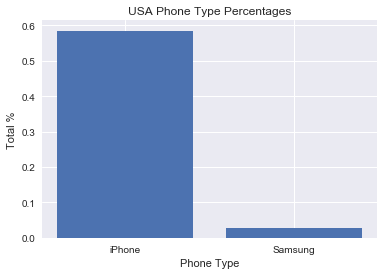

In [46]:
# visualize total percentages in USA of iPhones and Samsung
usa_pct_totals = [sum(usa['ShareNumeric'][usa.PhoneType == 'iPhone']),
                 sum(usa['ShareNumeric'][usa.PhoneType == 'Samsung'])]
plt.bar(x=['iPhone','Samsung'],height=usa_pct_totals)
plt.title('USA Phone Type Percentages')
plt.xlabel('Phone Type')
plt.ylabel('Total %')
plt.show()

Nearly 60% of the phones captured by the Device Atlas app are iPhones. Barely 3% are Samsung. As for the remaining percentage, we can not really make any conclusions. The table only takes the top 10 percentages. The remaining percentages could come from older iPhone models, other Samsung models, or even other types of phones. We would need more data to determine this

## USA Conclusion

Based on the USA data I would advise making the first app version of the start up service on the iOS operating System.
<br/>
<br/>

# Global Exploratory Data Analysis

Now we will explore the popular of phone types on a global scale

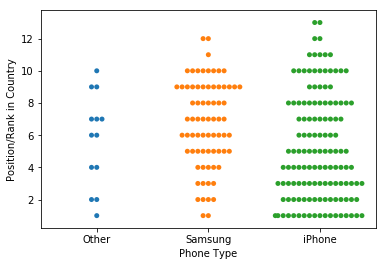

In [15]:
# get a swarm plot of the positions for each Phone Type
sns.swarmplot(x=data['PhoneType'], y=data['Rank'])
plt.xlabel('Phone Type')
plt.ylabel('Position/Rank in Country')
plt.show()

Observations:
* iPhone usage is spread across all ranks. Most populated at the higher ranks (ranks 1 and 3).
* Samsung phones are more dense around ranks 8 to 10.
* Other phones are about evenly spread through out the ranks up to 10.

Lets check out the views of the data through box and violin plots

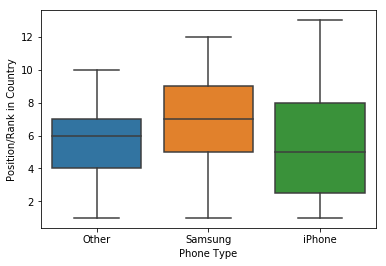

In [16]:
# box plot view
sns.boxplot(x=data['PhoneType'], y=data['Rank'])
plt.xlabel('Phone Type')
plt.ylabel('Position/Rank in Country')
plt.show()

From the box plot we can see the spread of the data and the median ranks of the data.
* iPhones have a median rank of 5
* Samsungs have a median rank of 7
* Other phones have a median rank of 6

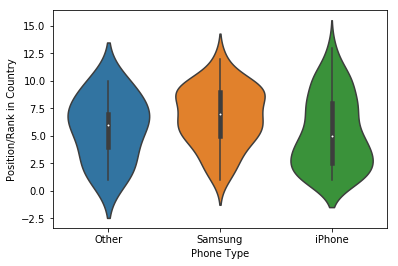

In [17]:
# violin plot
sns.violinplot(x=data['PhoneType'], y=data['Rank'])
plt.xlabel('Phone Type')
plt.ylabel('Position/Rank in Country')
plt.show()

These violin plots reciprocate the horizontal spread of the data more clearly. This is particularly true for the Other phone types. Recall from the swarm plot that there were 3 phones at rank 7. 

Now we will look at the distribution of the ranks on distribution plots.

C:\Users\Sabal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


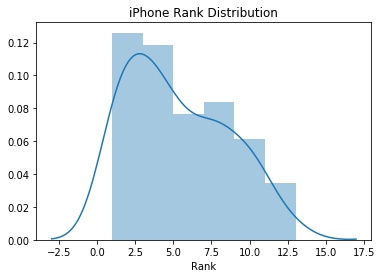

In [18]:
# see distribution for iphone
sns.distplot(data['Rank'][data.PhoneType =='iPhone'])
plt.title('iPhone Rank Distribution')
plt.xlabel('Rank')
plt.show()

iPhones have a sort of right skewed distribution with the mean around rank 3

C:\Users\Sabal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


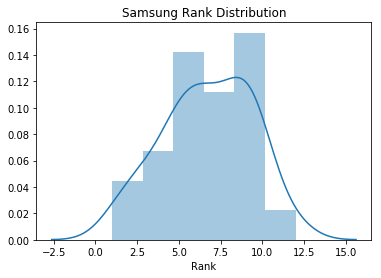

In [19]:
# see distribution for samsung
sns.distplot(data['Rank'][data.PhoneType =='Samsung'])
plt.title('Samsung Rank Distribution')
plt.xlabel('Rank')
plt.show()

Samsung has a close normal distribution. It is almost bimodal.

C:\Users\Sabal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


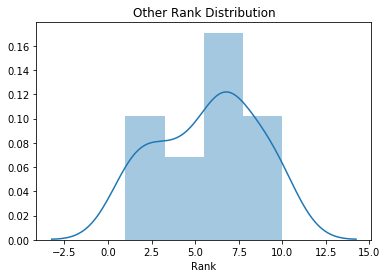

In [20]:
# see distribution for other phone types
sns.distplot(data['Rank'][data.PhoneType =='Other'])
plt.title('Other Rank Distribution')
plt.xlabel('Rank')
plt.show()

The other phone ranks form an almost centered normal distribution at about rank 6.

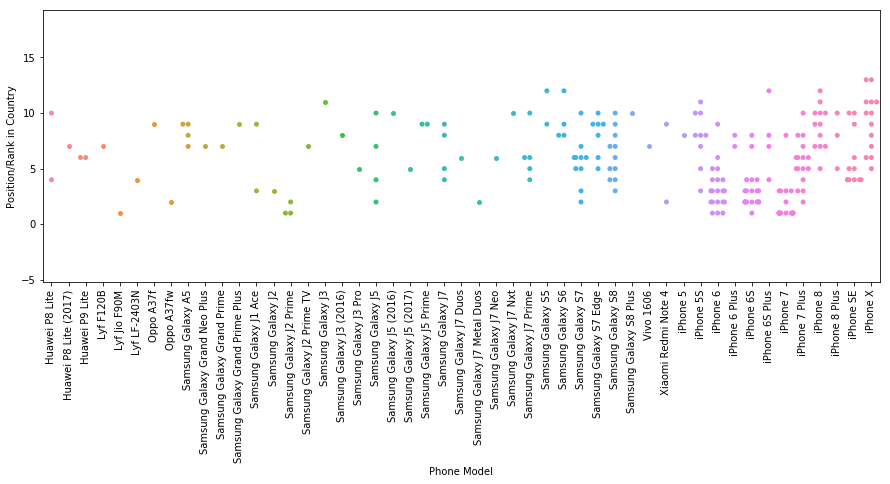

In [21]:
# do swarmplot for phone types
plt.figure(figsize=(15,5))
sns.swarmplot(x=data['Phone model'], y=data['Rank'])
plt.xlabel('Phone Model')
plt.xticks(rotation='vertical')
plt.margins(0.5)
plt.ylabel('Position/Rank in Country')
plt.show()

Not the best plot for this. Lets try the box plot instead

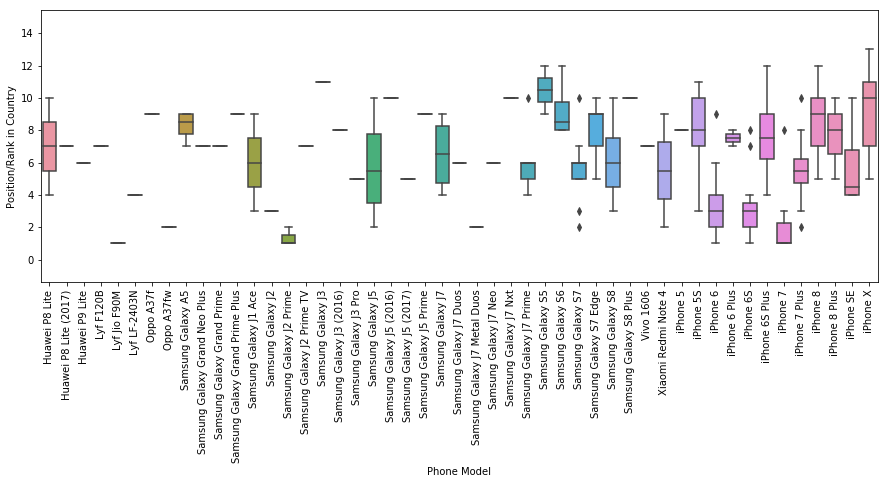

In [22]:
# do the same for each phone model
plt.figure(figsize=(15,5))
sns.boxplot(x=data['Phone model'], y=data['Rank'])
plt.xlabel('Phone Model')
plt.xticks(rotation='vertical')
plt.margins(0.2)
plt.ylabel('Position/Rank in Country')
plt.show()

Better, but there are two many phones to look at a once. Some phones only have single data points so the median defaults to them (suchs as the Lyf and two of the Huawei).

Now we will create ECDF charts for the 3 phone types based on rank and percentage share of popularity.

In [23]:
# Create function for ECDF
def ecdf(data):
    xaxis=np.sort(data)# sort the data
    yaxis=np.arange(1,len(data)+1)/len(data)# create percentages for y axis from 1% to 100%
    return xaxis, yaxis

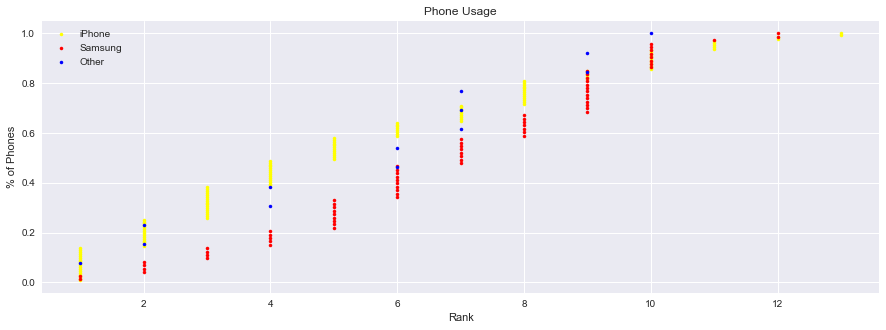

In [24]:
# ECDF plots iphone, samsung and other phone with rank
sns.set()
plt.figure(figsize=(15,5))
# Create phone type, color list, and dictionary to pair two lists
phone_type=data['PhoneType'].unique()
colors=['yellow','red','blue']
colordict=dict(zip(phone_type,colors))

# Apply ecdf function to each phone type and plot it
for phone in phone_type:
    xs,ys=ecdf(data['Rank'][data.PhoneType==phone])
    plt.plot(xs,ys, marker='.', linestyle='none',color=colordict[phone])  

#plot the 3 ecdfs
plt.title('Phone Usage')
plt.xlabel('Rank')
plt.ylabel('% of Phones')
plt.legend(phone_type)
plt.show()

iPhone:
* About 50% of the phones are rank 6 and above.
* Some outliers at the 11th and 12th rank

Samsung:
* About 50% of the phones are rank 4 and above. So perhaps Samsung phones are more preferred.
* One outlier at rank 13.

Other:
* Ranks are more spread out. Mostly at even ranks

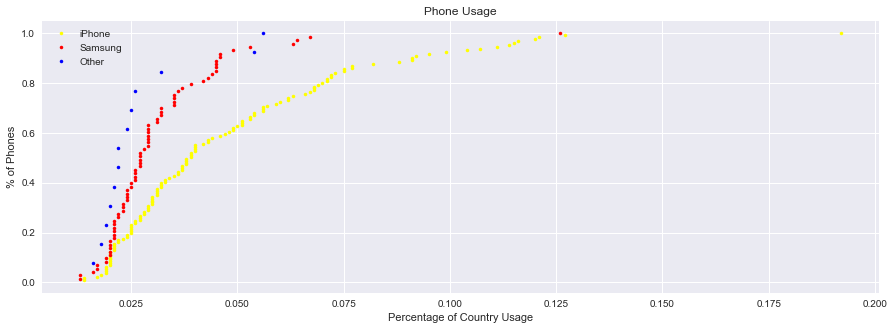

In [48]:
# ECDF plots iphone, samsung and other phone with percentage of country usage
plt.figure(figsize=(15,5))

# Create phone type, color list, and dictionary to pair two lists
phone_type=data['PhoneType'].unique()
colors=['yellow','red','blue']
colordict=dict(zip(phone_type,colors))

# Apply ecdf function to each phone type and plot it
for phone in phone_type:
    xs,ys=ecdf(data['ShareNumeric'][data.PhoneType==phone])
    plt.plot(xs,ys, marker='.', linestyle='none',color=colordict[phone])  

# plot the 3 ecdfs
plt.title('Phone Usage')
plt.xlabel('Percentage of Country Usage')
plt.ylabel('% of Phones')
plt.legend(phone_type)
plt.show()

iPhone:
* Widest percentage variation. Ranges from less than 2.5% all the way to about 12.5%
* About 80% of the phones are used by at most 7.5% of their countries' populations.

Samsung:
* Majority of phones used by at most 5% of their respective populations.
* one percentage outlier of about 12.5% usage

Other:
* Overall small percentage for each phone.
* Specifically, abouth 80% of the other phone types are used by about 2.5% to 3% of those surveyed.